# Predicting the Presence of Heart Disease Through Age, Resting Blood Pressure, and Serum Cholesterol Levels

## 1. Introduction

Heart disease, also known as cardiovascular disease (CVD), remains a leading cause of death globally. The American Heart Association (AHA) highlights that health behaviours like cholesterol, blood pressure, heart rhythm, and glucose control heavily contribute to cardiovascular health, varying by age and sex. AHA reports that the risk of developing CVD increases with age due to changes in heart structure and function over time. High cholesterol is also a direct indicator of cardiovascular events due to the build-up of fatty deposits in arteries. Additionally, research has proven that chest pain type and diastolic blood pressure significantly contribute to predicting heart disease presence. However, although these factors may play an important role in heart disease diagnosis, to build a classification algorithm, the input variables must all be numerical and not categorical. Thus, in this project, we aim to answer the research question:  

*"How well do age, resting blood pressure, and serum cholesterol levels of an individual predict the presence of heart disease?"*

To achieve this, a dataset generated by scraping [archive.ics.uci.edu](archive.ics.uci.edu) is used as it provides the presence of heart disease in individuals based on various health attributes that contribute to the presence of health disease. In this project, the Cleveland dataset is chosen as it is most extensively studied and validated by researchers. It has also been preprocessed to remove patients' sensitive information to ensure data consistency. Previous studies have also used this dataset to identify the presence of heart disease, aligning well with this project’s goal.

In [1]:
# * 'age' : age of the patient
# * 'sex' : sex/gender of the patient
# * 'cp' : chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
# * 'trestbps' : resting blood pressure (in mmHg on admission to the hospital)
# * 'chol' : serum cholesterol (in mg/dl)
# * 'fbs' : fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
# * 'restecg' : resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality)
# * 'thalach' : maximum heart rate achieved
# * 'exang' : exercise induced angina (1 = yes; 0 = no)
# * 'oldpeak' : ST depression induced by exercise relative to rest
# * 'slope' : the slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
# * 'ca' : number of major vessels (0-3) colored by fluoroscopy
# * 'thal' : (3 = normal; 6 = fixed defect; 7 = reversible defect)
# * 'num' : diagnosis of heart disease (0 = no heart disease, 1-4 = heart disease present)

In [2]:
#library needed for this project
library(tidyverse)
library(dplyr)
library(RColorBrewer)
library(tidyr)
library(tidymodels)
library(repr)
library(cowplot)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

## 2. Data Analysis
### 2.1 Load data into Jupyter notebook

In [3]:
# Create a temporary file
temp <- tempfile()
download.file("https://archive.ics.uci.edu/static/public/45/heart+disease.zip", temp)

# Create connections to the data within the file
con.processed.cleveland <- unzip(temp, "processed.cleveland.data")

# Read the data
processed.cleveland.data <- read.table(con.processed.cleveland, sep = ",", na = "?")

# Unlink the temporary file
unlink(temp)

# Name columns 
colnames(processed.cleveland.data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
                                        "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

# Display the first few rows of the dataset
processed.cleveland.data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
38,1,3,138,175,0,0,173,0,0.0,1,NA,3,0


In [4]:
# Another way to load data in the template repository, under the `data` directory:
# processed.cleveland.data <- read_csv("data/heart_disease/processed.cleveland.data")
# processed.cleveland.data

In [5]:
# Converting the target value (num) to binary
labelled.cleveland.data <- processed.cleveland.data |>
    mutate(num = factor(num, levels = c(0, 1, 2, 3, 4), labels = c("no", "yes", "yes", "yes", "yes")))
labelled.cleveland.data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,no
67,1,4,160,286,0,2,108,1,1.5,2,3,3,yes
67,1,4,120,229,0,2,129,1,2.6,2,2,7,yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1,7,yes
57,0,2,130,236,0,2,174,0,0.0,2,1,3,yes
38,1,3,138,175,0,0,173,0,0.0,1,NA,3,no


### 2.2 Split Training and Testing data

In [6]:
set.seed(123) # Sets seed for reproducibility
cleveland_split <- initial_split(labelled.cleveland.data, prop = 0.75)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

cleveland_train
cleveland_test

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
43,1,3,130,315,0,0,162,0,1.9,1,1,3,no
44,1,2,120,263,0,0,173,0,0.0,1,0,7,no
68,0,3,120,211,0,2,115,0,1.5,2,0,3,no
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
42,1,3,120,240,1,0,194,0,0.8,3,0,7,no
57,1,4,110,201,0,0,126,1,1.5,2,0,6,no
57,0,4,120,354,0,0,163,1,0.6,1,0,3,no


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
67,1,4,160,286,0,2,108,1,1.5,2,3,3,yes
67,1,4,120,229,0,2,129,1,2.6,2,2,7,yes
56,0,2,140,294,0,2,153,0,1.3,2,0,3,no
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
67,1,3,152,212,0,2,150,0,0.8,2,0,7,yes
55,0,2,132,342,0,0,166,0,1.2,1,0,3,no
38,1,3,138,175,0,0,173,0,0.0,1,NA,3,no


### 2.3 Summary of data

In [7]:
summary_table <- cleveland_train |>
    group_by(num) |>
    summarize(mean_age = mean(age, na.rm = TRUE),
              mean_trestbps = mean(trestbps, na.rm = TRUE),
              mean_chol = mean(chol, na.rm = TRUE),
              n = n())

missing_data <- cleveland_train|>
    summarize(missing_data_in_dataset = sum(is.na(cleveland_train)),
              missing_age = sum(is.na(age)),
              missing_trestbps = sum(is.na(trestbps)),
              missing_chol = sum(is.na(chol)))

summary_table
missing_data

num,mean_age,mean_trestbps,mean_chol,n
<fct>,<dbl>,<dbl>,<dbl>,<int>
no,52.80165,129.2727,245.1653,121
yes,56.33962,134.0943,247.3868,106


missing_data_in_dataset,missing_age,missing_trestbps,missing_chol
<int>,<int>,<int>,<int>
4,0,0,0


### 2.4 Visualization of Data

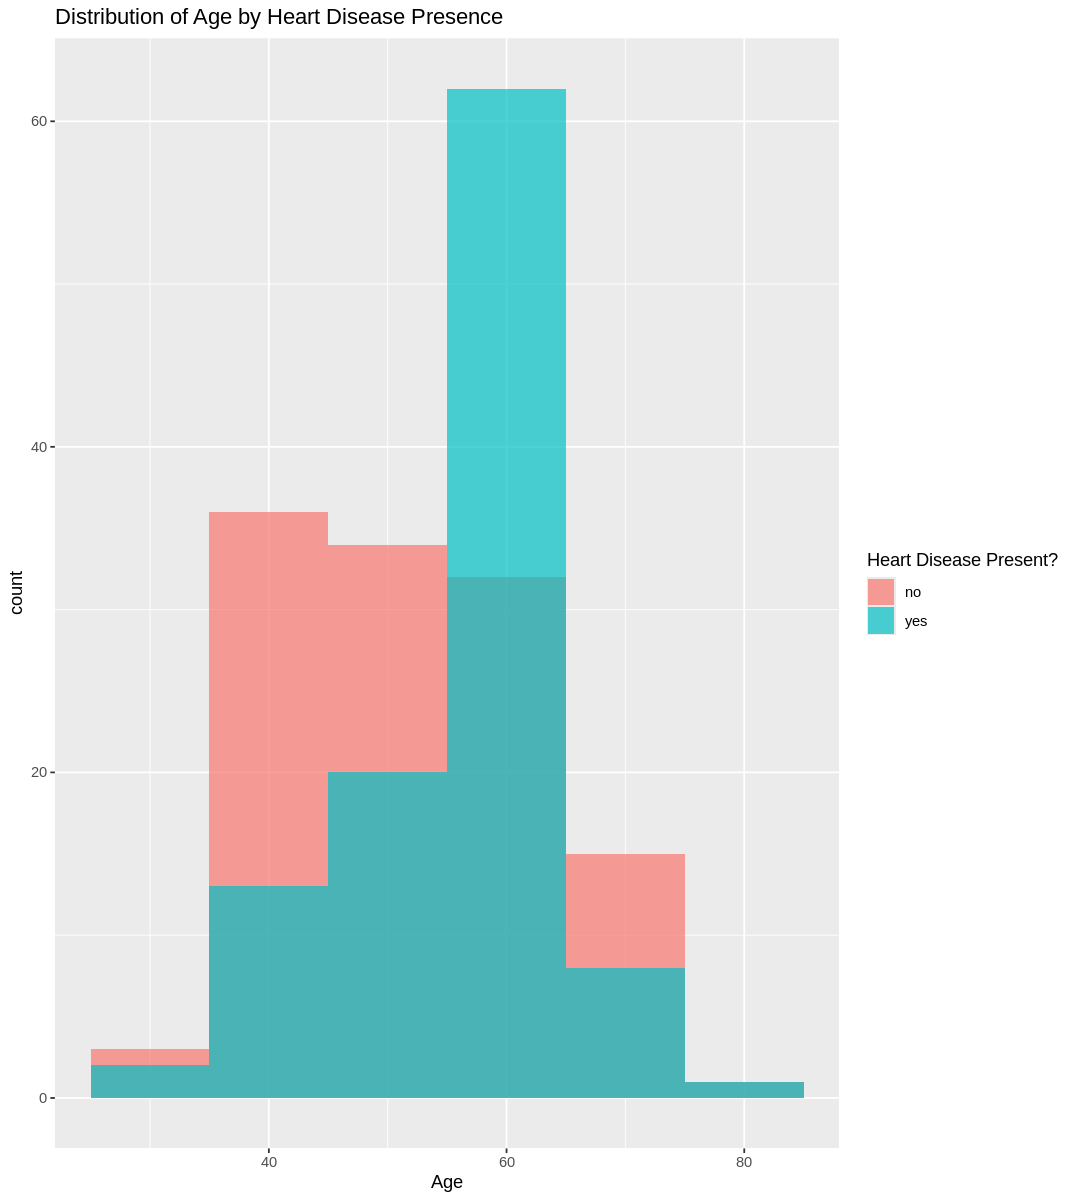

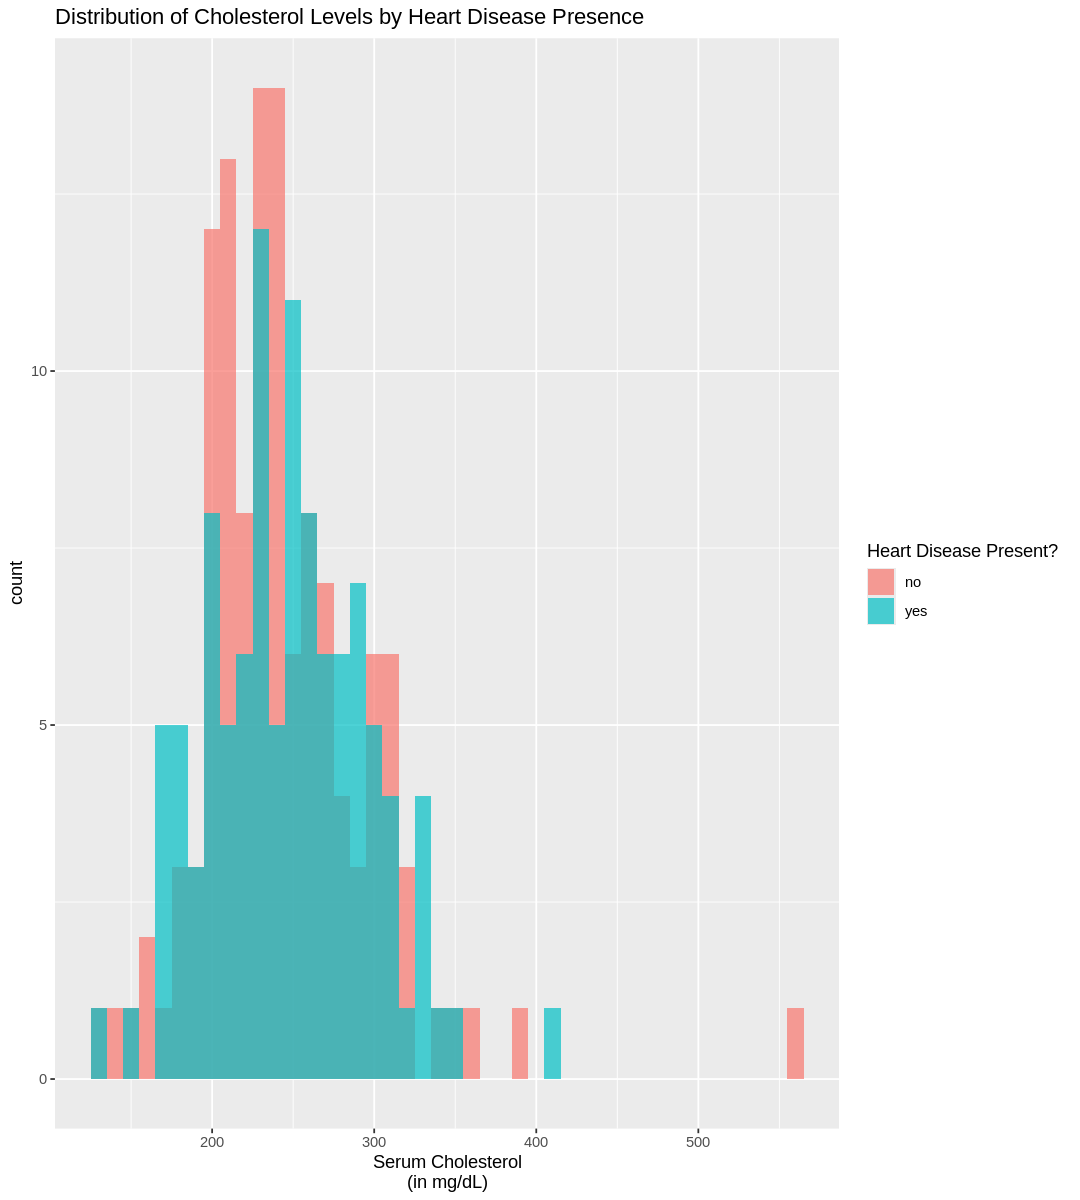

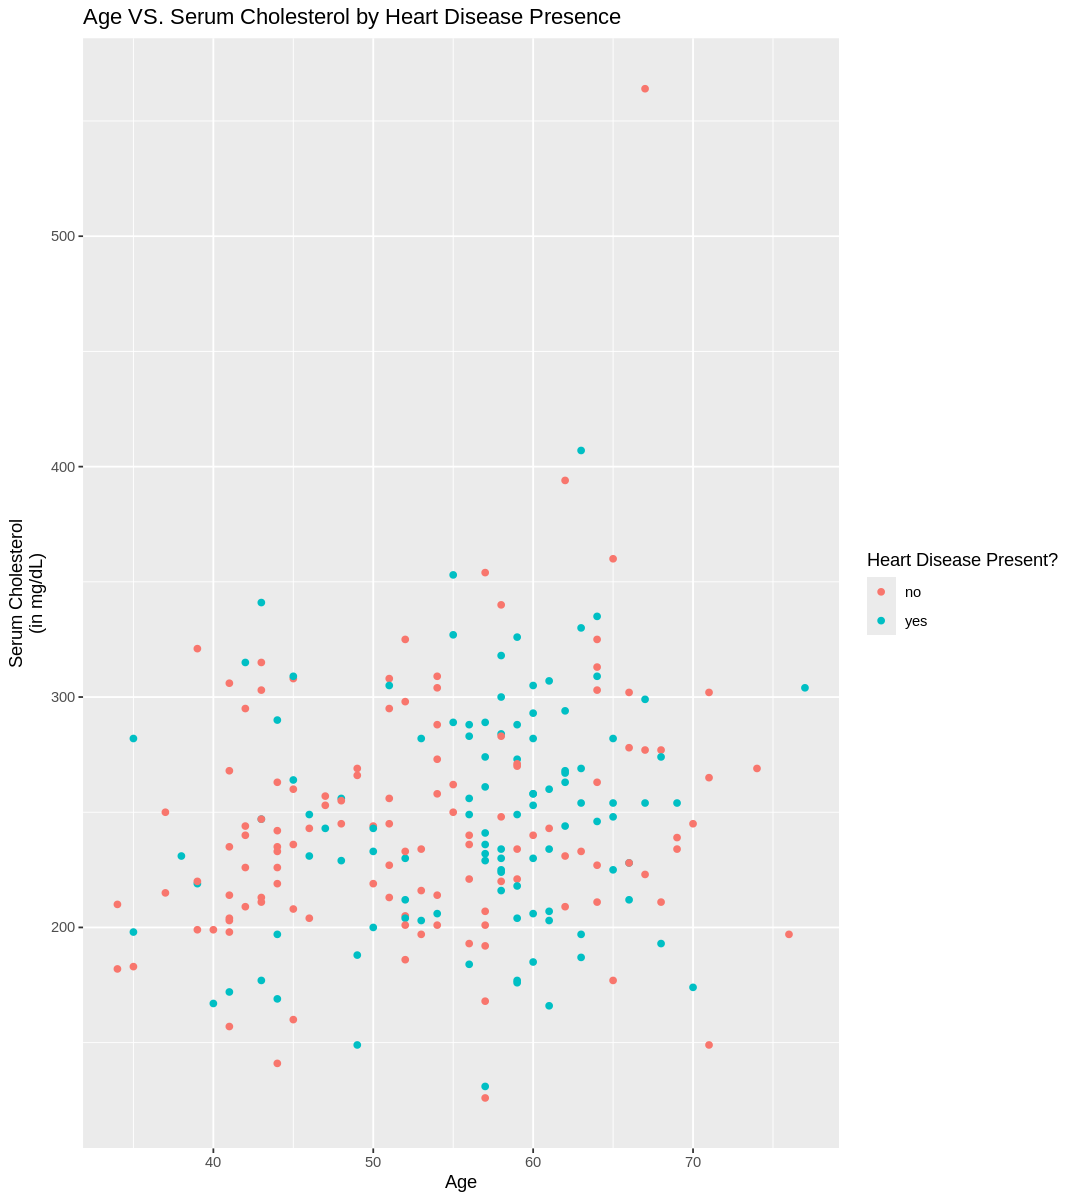

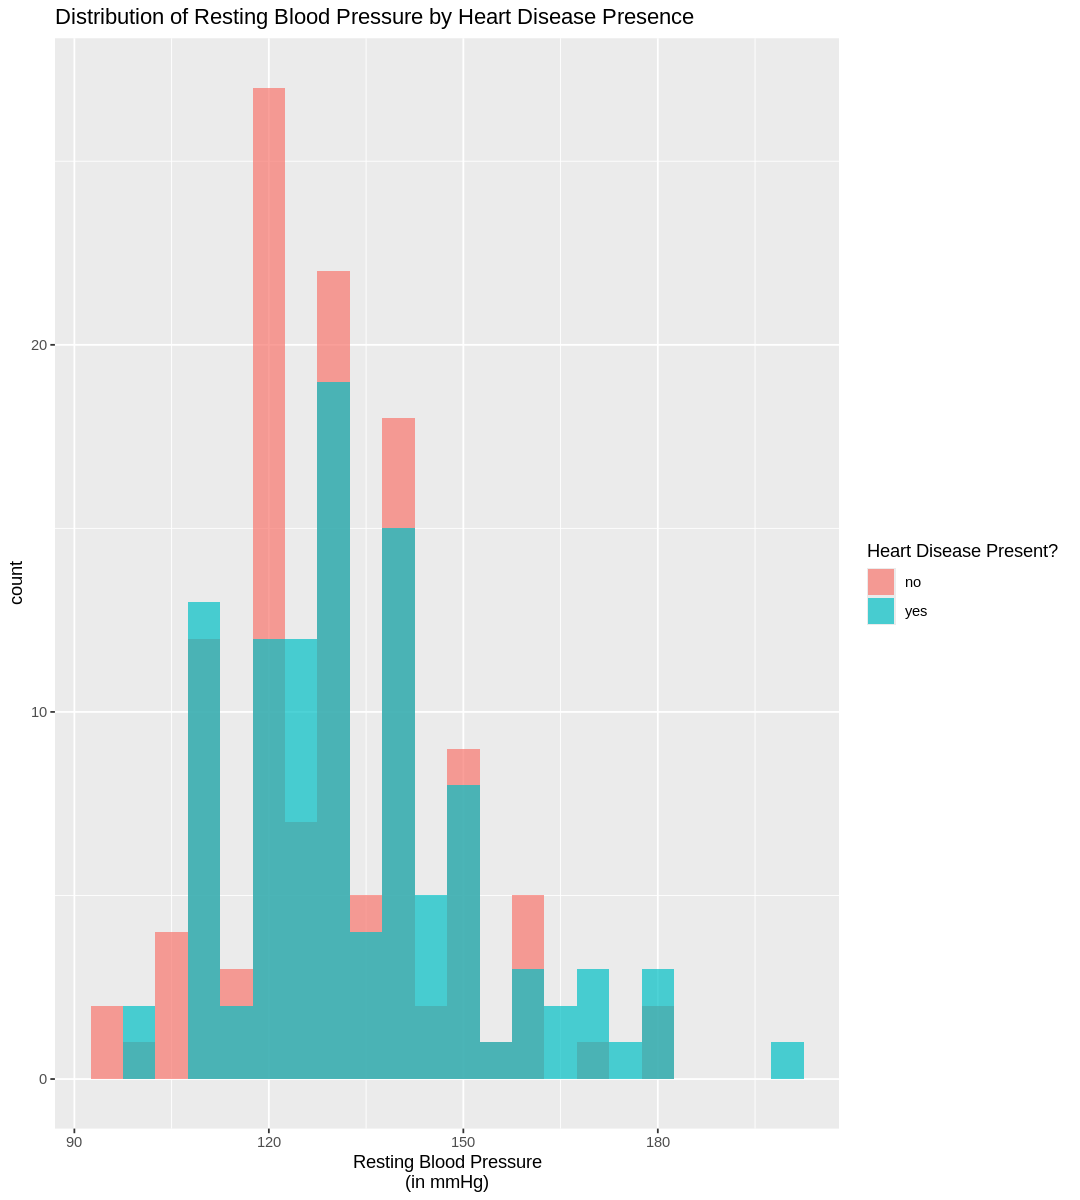

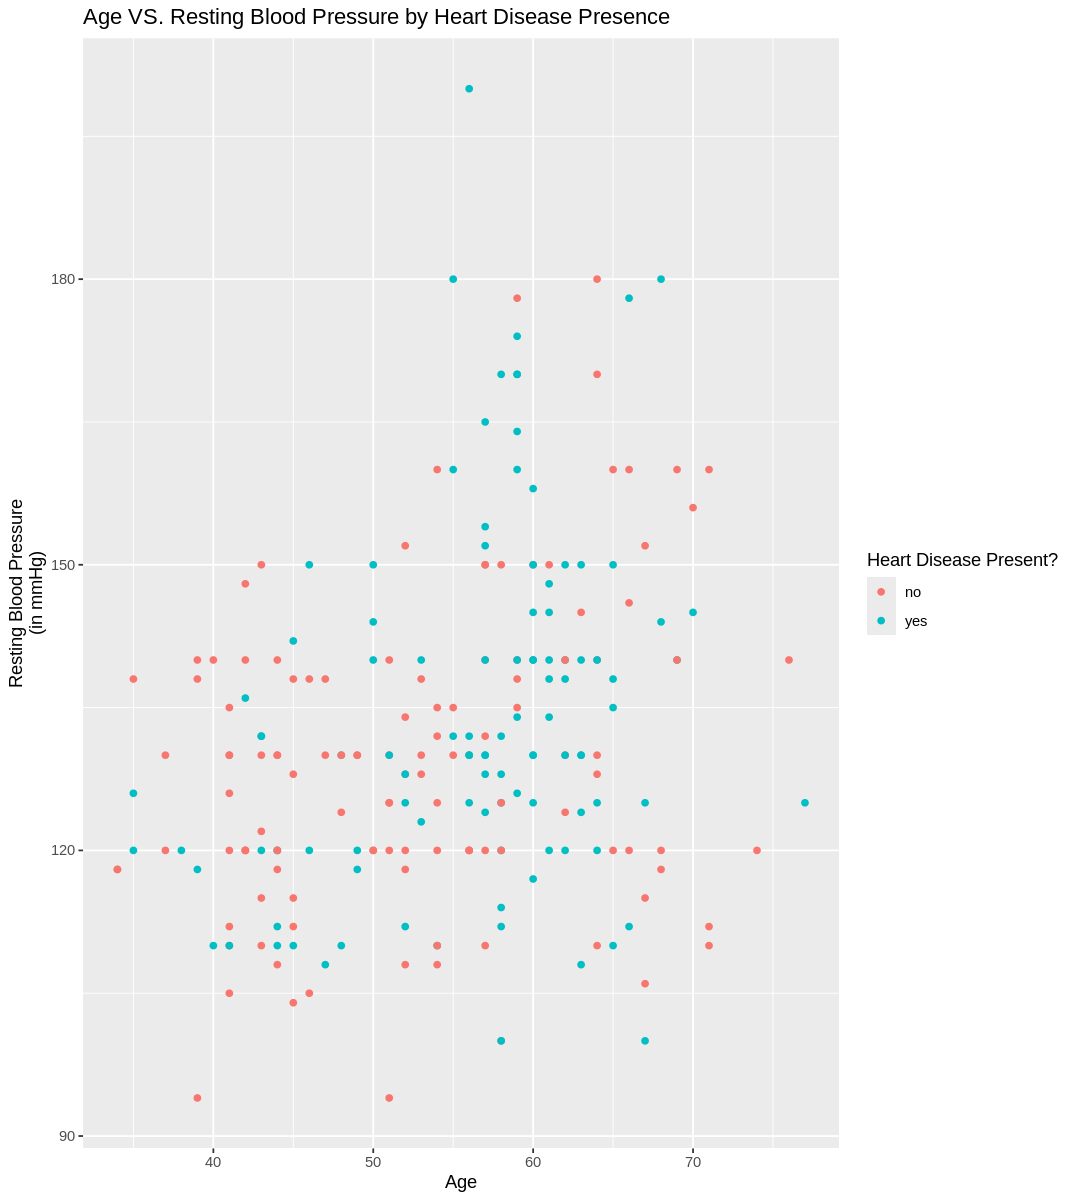

In [8]:
options(repr.plot.width = 9, repr.plot.height = 10)

# Histogram of distribution of age by heart disease presence
age_vs_CVD <- cleveland_train |>
    ggplot(aes(x = age, fill = as_factor(num))) +
    geom_histogram(binwidth = 10, alpha = 0.7, position = "identity") +
    labs(title = "Distribution of Age by Heart Disease Presence", x = "Age", fill = "Heart Disease Present?")
age_vs_CVD

# Histogram of distribution of serum cholesterol by heart disease presence
chol_vs_CVD <- cleveland_train |>
    ggplot(aes(x = chol, fill = as_factor(num))) +
    geom_histogram(binwidth = 10, alpha = 0.7, position = "identity") +
    labs(title = "Distribution of Cholesterol Levels by Heart Disease Presence", x = "Serum Cholesterol\n(in mg/dL)", fill = "Heart Disease Present?")
chol_vs_CVD

# Scatter plot of the relationship between age and serum cholesterol by heart disease presence
age_vs_chol <- cleveland_train |>
    ggplot(aes(x = age, y = chol, color = as_factor(num))) +
    geom_point() +
    labs(title = "Age VS. Serum Cholesterol by Heart Disease Presence", x = "Age", y = "Serum Cholesterol\n(in mg/dL)", color = "Heart Disease Present?")
age_vs_chol

# Histogram of distribution of resting blood pressure by heart disease presence
trestbps_vs_CVD <- cleveland_train |>
    ggplot(aes(x = trestbps, fill = as_factor(num))) +
    geom_histogram(binwidth = 5, alpha = 0.7, position = "identity") +
    labs(title = "Distribution of Resting Blood Pressure by Heart Disease Presence", x = "Resting Blood Pressure\n(in mmHg)", fill = "Heart Disease Present?")
trestbps_vs_CVD

# Scatter plot of the relationship between age and resting blood pressure by heart disease presence
age_vs_trestbps <- cleveland_train |>
    ggplot(aes(x = age, y = trestbps, color = as_factor(num))) +
    geom_point() +
    labs(title = "Age VS. Resting Blood Pressure by Heart Disease Presence", x = "Age", y = "Resting Blood Pressure\n(in mmHg)", color = "Heart Disease Present?")
age_vs_trestbps

## 3. Methods

1. **Data Preprocessing**: Handling missing values and converting categorical variables into factors as required.
2. **Exploratory Data Analysis**: Visualization tools are created to analyze relationships between predictor variables and the target variable.
3. **Model Selection**: Building a classification model based on the k-Nearest Neighbors (KNN) classification algorithm.
4. **Model Training and Evaluation**: Training the KNN model on the training set then evaluating its performance on the testing set using accuracy, precision, and recall metrics.
5. **Visualization of Results**: Using appropriate plots and tables to visualize the performance of the model.

The predictors chosen – age, serum cholesterol levels, and diastolic blood pressure – were chosen thoroughly after doing background research. Previous studies have proven that these categories are strong predictors for the classification of heart disease presence when used as predictors altogether.

## 4. Expected Outcomes & Significance

**What do you expect to find?**

Considering the multifactorial nature of heart disease, we anticipate the classification model to achieve low accuracy with only a subset of predictors. However, based on previous studies, age, diastolic blood pressure, and serum cholesterol have shown significant associations with heart disease. Therefore, these variables may contribute meaningfully to predicting the presence of heart disease. Preliminary analysis suggests moderate predictive power, which may lead to a viable classification model. Specifically, older age, asymptomatic chest pain, and higher diastolic pressure and cholesterol levels are likely to be associated with a higher risk of heart disease.

**What impact could such findings have?**

The success of the classification model could have significant implications for the healthcare sector, allowing healthcare professionals to identify at-risk individuals more efficiently. This would save time and resources, enabling quicker interventions and potentially improving patient outcomes. Moreover, the reduced number of required tests would make the screening process less invasive and more accessible to a broader population, facilitating earlier detection and treatment of heart disease.

**What future questions could this lead to?**

While this model focuses on numerical variables, future research could include categorical variables like lifestyle habits and genetic markers to enhance predictive accuracy. Additionally, exploring the interactions between these variables could provide deeper insights. Further studies could also evaluate the model's performance across different populations and settings, potentially leading to models that account for demographic differences in heart disease prevalence.

## 5. References
*All references are formatted in MLA style*

* *Cardiovascular diseases (CVDs)*. (n.d.). Who.int. Retrieved June 3, 2024, from https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)
* *CVD prevention: CVD risk assessment and treatment*. (n.d.). Org.uk. Retrieved June 5, 2024, from https://stpsupport.nice.org.uk/cholesterol/index.html
* Hossain, M. I., Maruf, M. H., Khan, M. A. R., Prity, F. S., Fatema, S., Ejaz, M. S., & Khan, M. A. S. (2023). Heart disease prediction using distinct artificial intelligence techniques: performance analysis and comparison. *Iran Journal of Computer Science*, 6(4), 397–417. https://doi.org/10.1007/s42044-023-00148-7
* Loskot, F., & Novotny, P. (1990). Asymptomatic myocardial ischemia. *Zeitschrift Für Die Gesamte Innere Medizin Und Ihre Grenzgebiete*, 45(13). https://pubmed.ncbi.nlm.nih.gov/2238747/
* Virani, S. S., Alonso, A., Benjamin, E. J., Bittencourt, M. S., Callaway, C. W., Carson, A. P., Chamberlain, A. M., Chang, A. R., Cheng, S., Delling, F. N., Djousse, L., Elkind, M. S. V., Ferguson, J. F., Fornage, M., Khan, S. S., Kissela, B. M., Knutson, K. L., Kwan, T. W., Lackland, D. T., … On behalf of the American Heart Association Council on Epidemiology and Prevention Statistics Committee and Stroke Statistics Subcommittee. (2020). Heart disease and stroke statistics—2020 update: A report from the American Heart Association. *Circulation*, 141(9). https://doi.org/10.1161/cir.0000000000000757